In [1]:
#Imports


import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import torch
from torch import nn

%matplotlib notebook

OSError: [WinError 1455] The paging file is too small for this operation to complete

In [ ]:
#Load data for Channel flow with transpiration

data250 = np.loadtxt('numbers_250_5.txt', comments='%')
data480 = np.loadtxt('numbers_480_5.txt', comments='%')
data850 = np.loadtxt('numbers_850_5.txt', comments='%')

In [3]:
nu=1.5111*1e-5
u_tau250=0.0519
u_tau480=0.0495
u_tau850=0.0450

#dudystar
dudy250=data250[:,16]*nu/(u_tau250**2)
dudy480=data480[:,16]*nu/(u_tau480**2)
dudy850=data850[:,16]*nu/(u_tau850**2)
#uv
uv250=data250[:,9]*(u_tau250**2)
uv480=data480[:,9]*(u_tau480**2)
uv850=data850[:,9]*(u_tau850**2)
#uu
uu250=(data250[:,3])*(u_tau250**2)
uu480=(data480[:,3])*(u_tau480**2)
uu850=(data850[:,3])*(u_tau850**2)
#vv
vv250=(data250[:,4])*(u_tau250**2)
vv480=(data480[:,4])*(u_tau480**2)
vv850=(data850[:,4])*(u_tau850**2)
#ww
ww250=(data250[:,5])*(u_tau250**2)
ww480=(data480[:,5])*(u_tau480**2)
ww850=(data850[:,5])*(u_tau850**2)
#k
k250=0.5*(uu250+vv250+ww250)
k480=0.5*(uu480+vv480+ww480)
k850=0.5*(uu850+vv850+ww850)
#epsilonplus
epsilonplus250=data250[:,12]
epsilonplus480=data480[:,12]
epsilonplus850=data850[:,12]
#kplus
kplus250 = 0.5*(data250[:,3]+data250[:,4]+data250[:,5])
kplus480 = 0.5*(data480[:,3]+data480[:,4]+data480[:,5])
kplus850 = 0.5*(data850[:,3]+data850[:,4]+data850[:,5])
#y+
yplus250=data250[:,1]
yplus480=data480[:,1]
yplus850=data850[:,1]
              
#dudystar

dudystar250=dudy250*kplus250/epsilonplus250
dudystar480=dudy480*kplus480/epsilonplus480
dudystar850=dudy850*kplus850/epsilonplus850
              
#buv
buv250=uv250/(2*k250)
buv250[0]=0
buv250[-1]=0
buv480=uv480/(2*k480)
buv480[0]=0
buv480[-1]=0
buv850=uv850/(2*k850)
buv850[0]=0
buv850[-1]=0

C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide
C:\ProgramData\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


In [5]:
test=850 #Choose Friction Reynolds number

if test == 250:
    xtrain1 = dudystar480
    xtrain2 = dudystar850
    
    ytrain1 = buv480*1e1
    ytrain2 = buv850*1e1
    
    yplus_train1 = yplus480
    yplus_train2 = yplus850
    
    xtest=dudystar250
    ytest=buv250*1e1
    yplus_test=yplus250
    
    xval=dudystar250
    yval=buv250*1e1
    yplus_val=yplus250
    
    Retau_train1=480*1e-8
    Retau_train2=850*1e-8
    Retau_test=250*1e-8
    
if test == 480:
    xtrain1 = dudystar250
    xtrain2 = dudystar850
    
    ytrain1 = buv250*1e1
    ytrain2 = buv850*1e1
    
    yplus_train1 = yplus250
    yplus_train2 = yplus850
    
    xtest=dudystar480
    ytest=buv480*1e1
    yplus_test=yplus480
    
    xval=dudystar480
    yval=buv480*1e1
    yplus_val=yplus480
    
    Retau_train1=250*1e-8
    Retau_train2=850*1e-8
    Retau_test=480*1e-8
    
if test == 850:
    xtrain1 = dudystar250
    xtrain2 = dudystar480
    
    ytrain1 = buv250*1e1
    ytrain2 = buv480*1e1
    
    yplus_train1 = yplus250
    yplus_train2 = yplus480
    
    xtest=dudystar850
    ytest=buv850*1e1
    yplus_test=yplus850
    
    xval=dudystar850
    yval=buv850*1e1
    yplus_val=yplus850
    
    Retau_train1=250*1e-8
    Retau_train2=480*1e-8
    Retau_test=850*1e-8


In [6]:
#Format training1 x
xtrain_torch1=torch.from_numpy(xtrain1)
xtrain_in1=xtrain_torch1.view(1,1,len(xtrain1)).float()

#Add Reynolds number
re_train1=np.full((len(xtrain1)), Retau_train1)
re_train1=torch.from_numpy(re_train1)
re_train1=re_train1.view(1,1,len(re_train1)).float()
xtrain_in1=torch.cat((xtrain_in1,re_train1),dim=1)

#Format training1 y+ (for boundary condition enforcement)
yplus_train_torch1=torch.from_numpy(yplus_train1)
yplus_train_in1=yplus_train_torch1.view(1,1,len(xtrain1)).float()

#Format training1 y
ytrain_torch1=torch.from_numpy(ytrain1)
ytrain_in1=ytrain_torch1.view(1,1,len(xtrain1)).float()

#Format training2 x
xtrain_torch2=torch.from_numpy(xtrain2)
xtrain_in2=xtrain_torch2.view(1,1,len(xtrain2)).float()
#Add Reynolds number
re_train2=np.full((len(xtrain2)), Retau_train2)
re_train2=torch.from_numpy(re_train2)
re_train2=re_train2.view(1,1,len(re_train2)).float()
xtrain_in2=torch.cat((xtrain_in2,re_train2),dim=1)


#Format training2 y+ (for boundary condition enforcement)
yplus_train_torch2=torch.from_numpy(yplus_train2)
yplus_train_in2=yplus_train_torch2.view(1,1,len(xtrain2)).float()

#Format training2 y
ytrain_torch2=torch.from_numpy(ytrain2)
ytrain_in2=ytrain_torch2.view(1,1,len(xtrain2)).float()


In [7]:
xval=xtest
yval=ytest
yplus_val = yplus_test

#Format validation x
xval_torch=torch.from_numpy(xval)
xval_in=xval_torch.view(1,1,len(xval)).float()
#Add Reynolds number
re_trainval=np.full((len(xval)), Retau_test)
re_trainval=torch.from_numpy(re_trainval)
re_trainval=re_trainval.view(1,1,len(re_trainval)).float()
xval_in=torch.cat((xval_in,re_trainval),dim=1)

#Format validation y+ (for boundary condition enforcement)
yplus_val_torch=torch.from_numpy(yplus_val)
yplus_val_in=yplus_val_torch.view(1,1,len(xval)).float()

#Format validation y
yval_torch=torch.from_numpy(yval)
yval_in=yval_torch.view(1,1,len(xval)).float()

#Format testing x
xtest_torch=torch.from_numpy(xtest)
xtest_in=xtest_torch.view(1,1,len(xval)).float()
#Add Reynolds number
re_traintest=np.full((len(xval)), Retau_test)
re_traintest=torch.from_numpy(re_traintest)
re_traintest=re_traintest.view(1,1,len(re_traintest)).float()
xtest_in=torch.cat((xtest_in,re_traintest),dim=1)

#Format testing y+ (for boundary condition enforcement)
yplus_test_torch=torch.from_numpy(yplus_test)
yplus_test_in=yplus_test_torch.view(1,1,len(xval)).float()

#Format testing y
ytest_torch=torch.from_numpy(ytest)
ytest_in=ytest_torch.view(1,1,len(xval)).float()

In [8]:
maxlength=max(xtrain1.shape[0],xtrain2.shape[0],xval.shape[0],xtest.shape[0])

In [9]:
shapex1=xtrain1.shape[0]
shapex2=xtrain2.shape[0]
shapexval=xval.shape[0]
shapextest=xtest.shape[0]
zerostrain1=torch.zeros(1,1,maxlength-xtrain1.shape[0])
zerostrain2=torch.zeros(1,1,maxlength-xtrain2.shape[0])
zerosval=torch.zeros(1,1,maxlength-xval.shape[0])
zerostest=torch.zeros(1,1,maxlength-xtest.shape[0])

zerostrain1_double=torch.zeros(1,2,maxlength-xtrain1.shape[0])
zerostrain2_double=torch.zeros(1,2,maxlength-xtrain2.shape[0])
zerosval_double=torch.zeros(1,2,maxlength-xval.shape[0])
zerostest_double=torch.zeros(1,2,maxlength-xtest.shape[0])
# converting the data into GPU format
xtrain_in1=torch.cat((xtrain_in1,zerostrain1_double), 2)
yplus_train_in1=torch.cat((yplus_train_in1,zerostrain1), 2)
ytrain_in1=torch.cat((ytrain_in1,zerostrain1), 2)

xtrain_in2=torch.cat((xtrain_in2,zerostrain2_double), 2)
yplus_train_in2=torch.cat((yplus_train_in2,zerostrain2), 2)
ytrain_in2=torch.cat((ytrain_in2,zerostrain2), 2)

xval_in=torch.cat((xval_in,zerosval_double), 2)
yplus_val_in=torch.cat((yplus_val_in,zerosval), 2)
yval_in=torch.cat((yval_in,zerosval), 2)

xtest_in=torch.cat((xtest_in,zerostest_double), 2)
yplus_test_in=torch.cat((yplus_test_in,zerostest), 2)
ytest_in=torch.cat((ytest_in,zerostest), 2)

In [10]:
#import required for the activation functions
import torch.nn.functional as F

class CONV_NN_BC(nn.Module):
    def __init__(self, structure=None):
        super(CONV_NN_BC, self).__init__()
        
        self.fc0=nn.Sequential(
                nn.Conv1d(2, 5, 3, 1),
                nn.BatchNorm1d(5),
                nn.ELU(inplace=True))
        self.fc1=nn.Sequential(
                nn.Conv1d(5, 5, 11, 1),
                nn.BatchNorm1d(5),
                nn.ELU(inplace=True))
        self.fc2=nn.Sequential(
                nn.Conv1d(5, 10, 31, 1),
                nn.BatchNorm1d(10),
                nn.ELU(inplace=True))
        self.fc3=nn.Sequential(
                nn.Conv1d(10, 10, 41, 1),
                nn.BatchNorm1d(10),
                nn.ELU(inplace=True))
        self.fc4=nn.Sequential(
                nn.Conv1d(10, 10, 41, 1),
                nn.ELU(inplace=True))
        
        
        self.final = nn.Conv1d(1,1, 10, stride=10)
        self.f = nn.Flatten()
        self.zerotensor0=torch.zeros(1,2,1)
        self.zerotensor1=torch.zeros(1,5,5)
        self.zerotensor2=torch.zeros(1,5,15)
        self.zerotensor3=torch.zeros(1,10,20)
        self.zerotensor4=torch.zeros(1,10,20)
        self.beta=0.1

        
    def forward(self,x,yplus):
        x = torch.cat((x,self.zerotensor0), 2)
        x = torch.cat((self.zerotensor0,x), 2)
        x = self.fc0(x)
        #pad tensor
        x = torch.cat((x,self.zerotensor1), 2)
        x = torch.cat((self.zerotensor1,x), 2)
        #Convolution
        x = self.fc1(x)
        #pad tensor
        x = torch.cat((x,self.zerotensor2), 2)
        x = torch.cat((self.zerotensor2,x), 2)
        #Convolution
        x = self.fc2(x)
        #pad tensor
        x = torch.cat((x,self.zerotensor3), 2)
        x = torch.cat((self.zerotensor3,x), 2)
        #Convolution
        x = self.fc3(x)
        #pad tensor
        x = torch.cat((x,self.zerotensor4), 2)
        x = torch.cat((self.zerotensor4,x), 2)
        #Convolution
        x = self.fc4(x)
        #Final layer 
        x = torch.mean(x,dim=0) #reshape tensor to apply transpose
        x = torch.transpose(x, 0, 1) #transpose tensor
        x = x[None,:,:] #reshape tensor
        x = self.f(x) #Flatten
        x = x[None,:,:] #reshape tensor
        x = self.final(x) #weighted average
        
        output = (1. - torch.exp(-self.beta * yplus))*x #Boundary condition enforcement
        
        return output

In [11]:
#CALL MODEL AND DEFINE LOSS AND OPTIMIZER FOR THE FUNCTION
# defining the model
model = CONV_NN_BC()
# defining the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.0001)
# defining the loss function
criterion = nn.MSELoss()
# checking if GPU is available
#if torch.cuda.is_available():
    #model = model.cuda()
    #criterion = criterion.cuda()

In [12]:
nn.init.constant_(model.final.weight,-0.1)
nn.init.kaiming_uniform_(model.fc0[0].weight)
nn.init.kaiming_uniform_(model.fc1[0].weight)
nn.init.kaiming_uniform_(model.fc2[0].weight)
nn.init.kaiming_uniform_(model.fc3[0].weight)
nn.init.kaiming_uniform_(model.fc4[0].weight)

Parameter containing:
tensor([[[-0.1193, -0.0132,  0.1062,  ..., -0.0374, -0.0794,  0.0389],
         [-0.0078,  0.1122, -0.0699,  ..., -0.0889,  0.0278, -0.0417],
         [-0.0381,  0.0135, -0.0516,  ..., -0.0241,  0.0009,  0.0627],
         ...,
         [-0.1112, -0.1080,  0.0842,  ..., -0.0197, -0.0201, -0.0101],
         [-0.0887, -0.0401, -0.0532,  ..., -0.0680,  0.1157, -0.0299],
         [ 0.0015,  0.0546,  0.1046,  ...,  0.0236,  0.1207,  0.0907]],

        [[-0.0185, -0.0082, -0.0236,  ..., -0.0067, -0.1072,  0.0132],
         [-0.0657,  0.0792,  0.0747,  ...,  0.0517,  0.1035, -0.0637],
         [-0.0135, -0.1164,  0.0675,  ...,  0.0288,  0.0844,  0.0117],
         ...,
         [-0.0475,  0.0676, -0.0173,  ..., -0.0528, -0.0872,  0.0720],
         [-0.0655, -0.0937,  0.0616,  ...,  0.1020,  0.1103,  0.0435],
         [-0.0293,  0.1081, -0.0858,  ...,  0.0968,  0.0741, -0.0338]],

        [[ 0.0052,  0.0196, -0.0017,  ..., -0.0619, -0.0714, -0.0658],
         [-0.0987, -0.0

In [13]:
#PRINT MODEL
print(model)

CONV_NN_BC(
  (fc0): Sequential(
    (0): Conv1d(2, 5, kernel_size=(3,), stride=(1,))
    (1): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
  )
  (fc1): Sequential(
    (0): Conv1d(5, 5, kernel_size=(11,), stride=(1,))
    (1): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
  )
  (fc2): Sequential(
    (0): Conv1d(5, 10, kernel_size=(31,), stride=(1,))
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
  )
  (fc3): Sequential(
    (0): Conv1d(10, 10, kernel_size=(41,), stride=(1,))
    (1): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0, inplace=True)
  )
  (fc4): Sequential(
    (0): Conv1d(10, 10, kernel_size=(41,), stride=(1,))
    (1): ELU(alpha=1.0, inplace=True)
  )
  (final): Conv1d(1, 1, kernel_size=(10,), st

In [14]:
print('Number of model parameters:', sum([p.numel() for p in model.parameters()]))

Number of model parameters: 10166


In [12]:
#DEFINE MODEL TRAINING FUNCTION1


def train1(epoch,k):
    
    #def squared_error(x,y):
    #sum((y - x) * (y - x))

    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train, yplus_train = xtrain_in1, ytrain_in1, yplus_train_in1
    # getting the validation set
    x_val, y_val, yplus_val = xval_in, yval_in, yplus_val_in 
    # getting the testing set
    x_test, y_test, yplus_test = xtest_in, ytest_in, yplus_test_in
    
        

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train,yplus_train)
    output_val = model(x_val,yplus_val)
    output_test=model(x_test,yplus_test)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    loss_test = criterion(output_test, y_test)
    if k%20==0:
        train_losses.append(loss_train)
        val_losses.append(loss_val)
        test_losses.append(loss_test)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%50 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss train:', loss_train.item(), 'loss val:', loss_val.item(), 'loss test:', loss_test.item())
    

In [13]:
#DEFINE MODEL TRAINING FUNCTION2


def train2(epoch,k):
    
    #def squared_error(x,y):
    #sum((y - x) * (y - x))

    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train, yplus_train = xtrain_in2, ytrain_in2, yplus_train_in2
    # getting the validation set
    x_val, y_val, yplus_val = xval_in, yval_in, yplus_val_in 
    # getting the testing set
    x_test, y_test, yplus_test = xtest_in, ytest_in, yplus_test_in
    # converting the data into GPU format
    
        

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train,yplus_train)
    output_val = model(x_val,yplus_val)
    output_test=model(x_test,yplus_test)

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    loss_test = criterion(output_test, y_test)
    if k%20==0:
        train_losses.append(loss_train)
        val_losses.append(loss_val)
        test_losses.append(loss_test)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%50 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss train:', loss_train.item(), 'loss val:', loss_val.item(), 'loss test:', loss_test.item())
    

In [14]:
import time
epoch=1
train_losses = []
val_losses = []
test_losses = []
count=0
k=0

for i in range(10000):
    k=k+1
    train1(epoch,k)
    k=k+1
    train2(epoch,k)
    count=count+1
    #torch.cuda.empty_cache()
    
    
    if count%100==0:
        print('Epoch : ',count, '\t', 'loss train:', train_losses[-1].item(), 'loss val:', val_losses[-1].item(), 'loss test:', test_losses[-1].item())


Epoch :  100 	 loss train: 0.05033588036894798 loss val: 0.02779444307088852 loss test: 0.02779444307088852
Epoch :  200 	 loss train: 0.030020620673894882 loss val: 0.017574002966284752 loss test: 0.017574002966284752
Epoch :  300 	 loss train: 0.021388797089457512 loss val: 0.013182733207941055 loss test: 0.013182733207941055
Epoch :  400 	 loss train: 0.015812337398529053 loss val: 0.010356097482144833 loss test: 0.010356097482144833
Epoch :  500 	 loss train: 0.012194933369755745 loss val: 0.010338176973164082 loss test: 0.010338176973164082
Epoch :  600 	 loss train: 0.009004960767924786 loss val: 0.01051273848861456 loss test: 0.01051273848861456
Epoch :  700 	 loss train: 0.0063989432528615 loss val: 0.008347222581505775 loss test: 0.008347222581505775
Epoch :  800 	 loss train: 0.005029752850532532 loss val: 0.008643393404781818 loss test: 0.008643393404781818
Epoch :  900 	 loss train: 0.0038203720469027758 loss val: 0.009125289507210255 loss test: 0.009125289507210255
Epoch :

In [12]:
xtrain_in1=xtrain_in1[:,:,0:shapex1]
xtrain_in2=xtrain_in2[:,:,0:shapex2]
yplus_train_in1=yplus_train_in1[:,:,0:shapex1]
yplus_train_in2=yplus_train_in2[:,:,0:shapex2]
ytrain_in1=ytrain_in1[:,:,0:shapex1]
ytrain_in2=ytrain_in2[:,:,0:shapex2]


xval_in=xval_in[:,:,0:shapexval]
yplus_val_in=yplus_val_in[:,:,0:shapexval]
yval_in=yval_in[:,:,0:shapexval]

xtest_in=xtest_in[:,:,0:shapextest]
yplus_test_in=yplus_test_in[:,:,0:shapextest]
ytest_in=ytest_in[:,:,0:shapextest]

a_train1=model(xtrain_in1,yplus_train_in1)
a_train2=model(xtrain_in2,yplus_train_in2)
a_train=torch.cat((a_train1,a_train2),2)
a_train=torch.mean(a_train, dim=0)
a_train=torch.mean(a_train, dim=0)
b_train=torch.cat((ytrain_in1,ytrain_in2),2)
b_train=torch.mean(b_train, dim=0)
b_train=torch.mean(b_train, dim=0)

a_val=model(xval_in,yplus_val_in)
a_val=torch.mean(a_val, dim=0)
a_val=torch.mean(a_val, dim=0)
b_val=torch.mean(yval_in, dim=1)
b_val=torch.mean(b_val, dim=0)
test_performance=criterion(ytest_in,model(xtest_in,yplus_test_in))
a_test=torch.mean(model(xtest_in,yplus_test_in), dim=0)
a_test=torch.mean(a_test, dim=0)
b_test=torch.mean(ytest_in, dim=1)
b_test=torch.mean(b_test, dim=0)
a_train=a_train.cpu().detach().numpy() 
b_train=b_train.cpu().detach().numpy()
a_val=a_val.cpu().detach().numpy() 
b_val=b_val.cpu().detach().numpy()
a_test=a_test.cpu().detach().numpy() 
b_test=b_test.cpu().detach().numpy()


from sklearn.metrics import r2_score
print('R^2: ','\t', 'train:', r2_score(b_train,a_train), 'val:', r2_score(b_val,a_val), 'test:', r2_score(b_test,a_test))



test_performance_piecewise=np.zeros_like(a_test)
for i in range(len(a_test)):
####################################################################################   
    test_performance_piecewise[i]=criterion(ytest_in[0,0,i],model(xtest_in,yplus_test_in)[0,0,i])
####################################################################################

R^2:  	 train: 0.9999930768782586 val: 0.9864919792265134 test: 0.9864919792265134


<IPython.core.display.Javascript object>


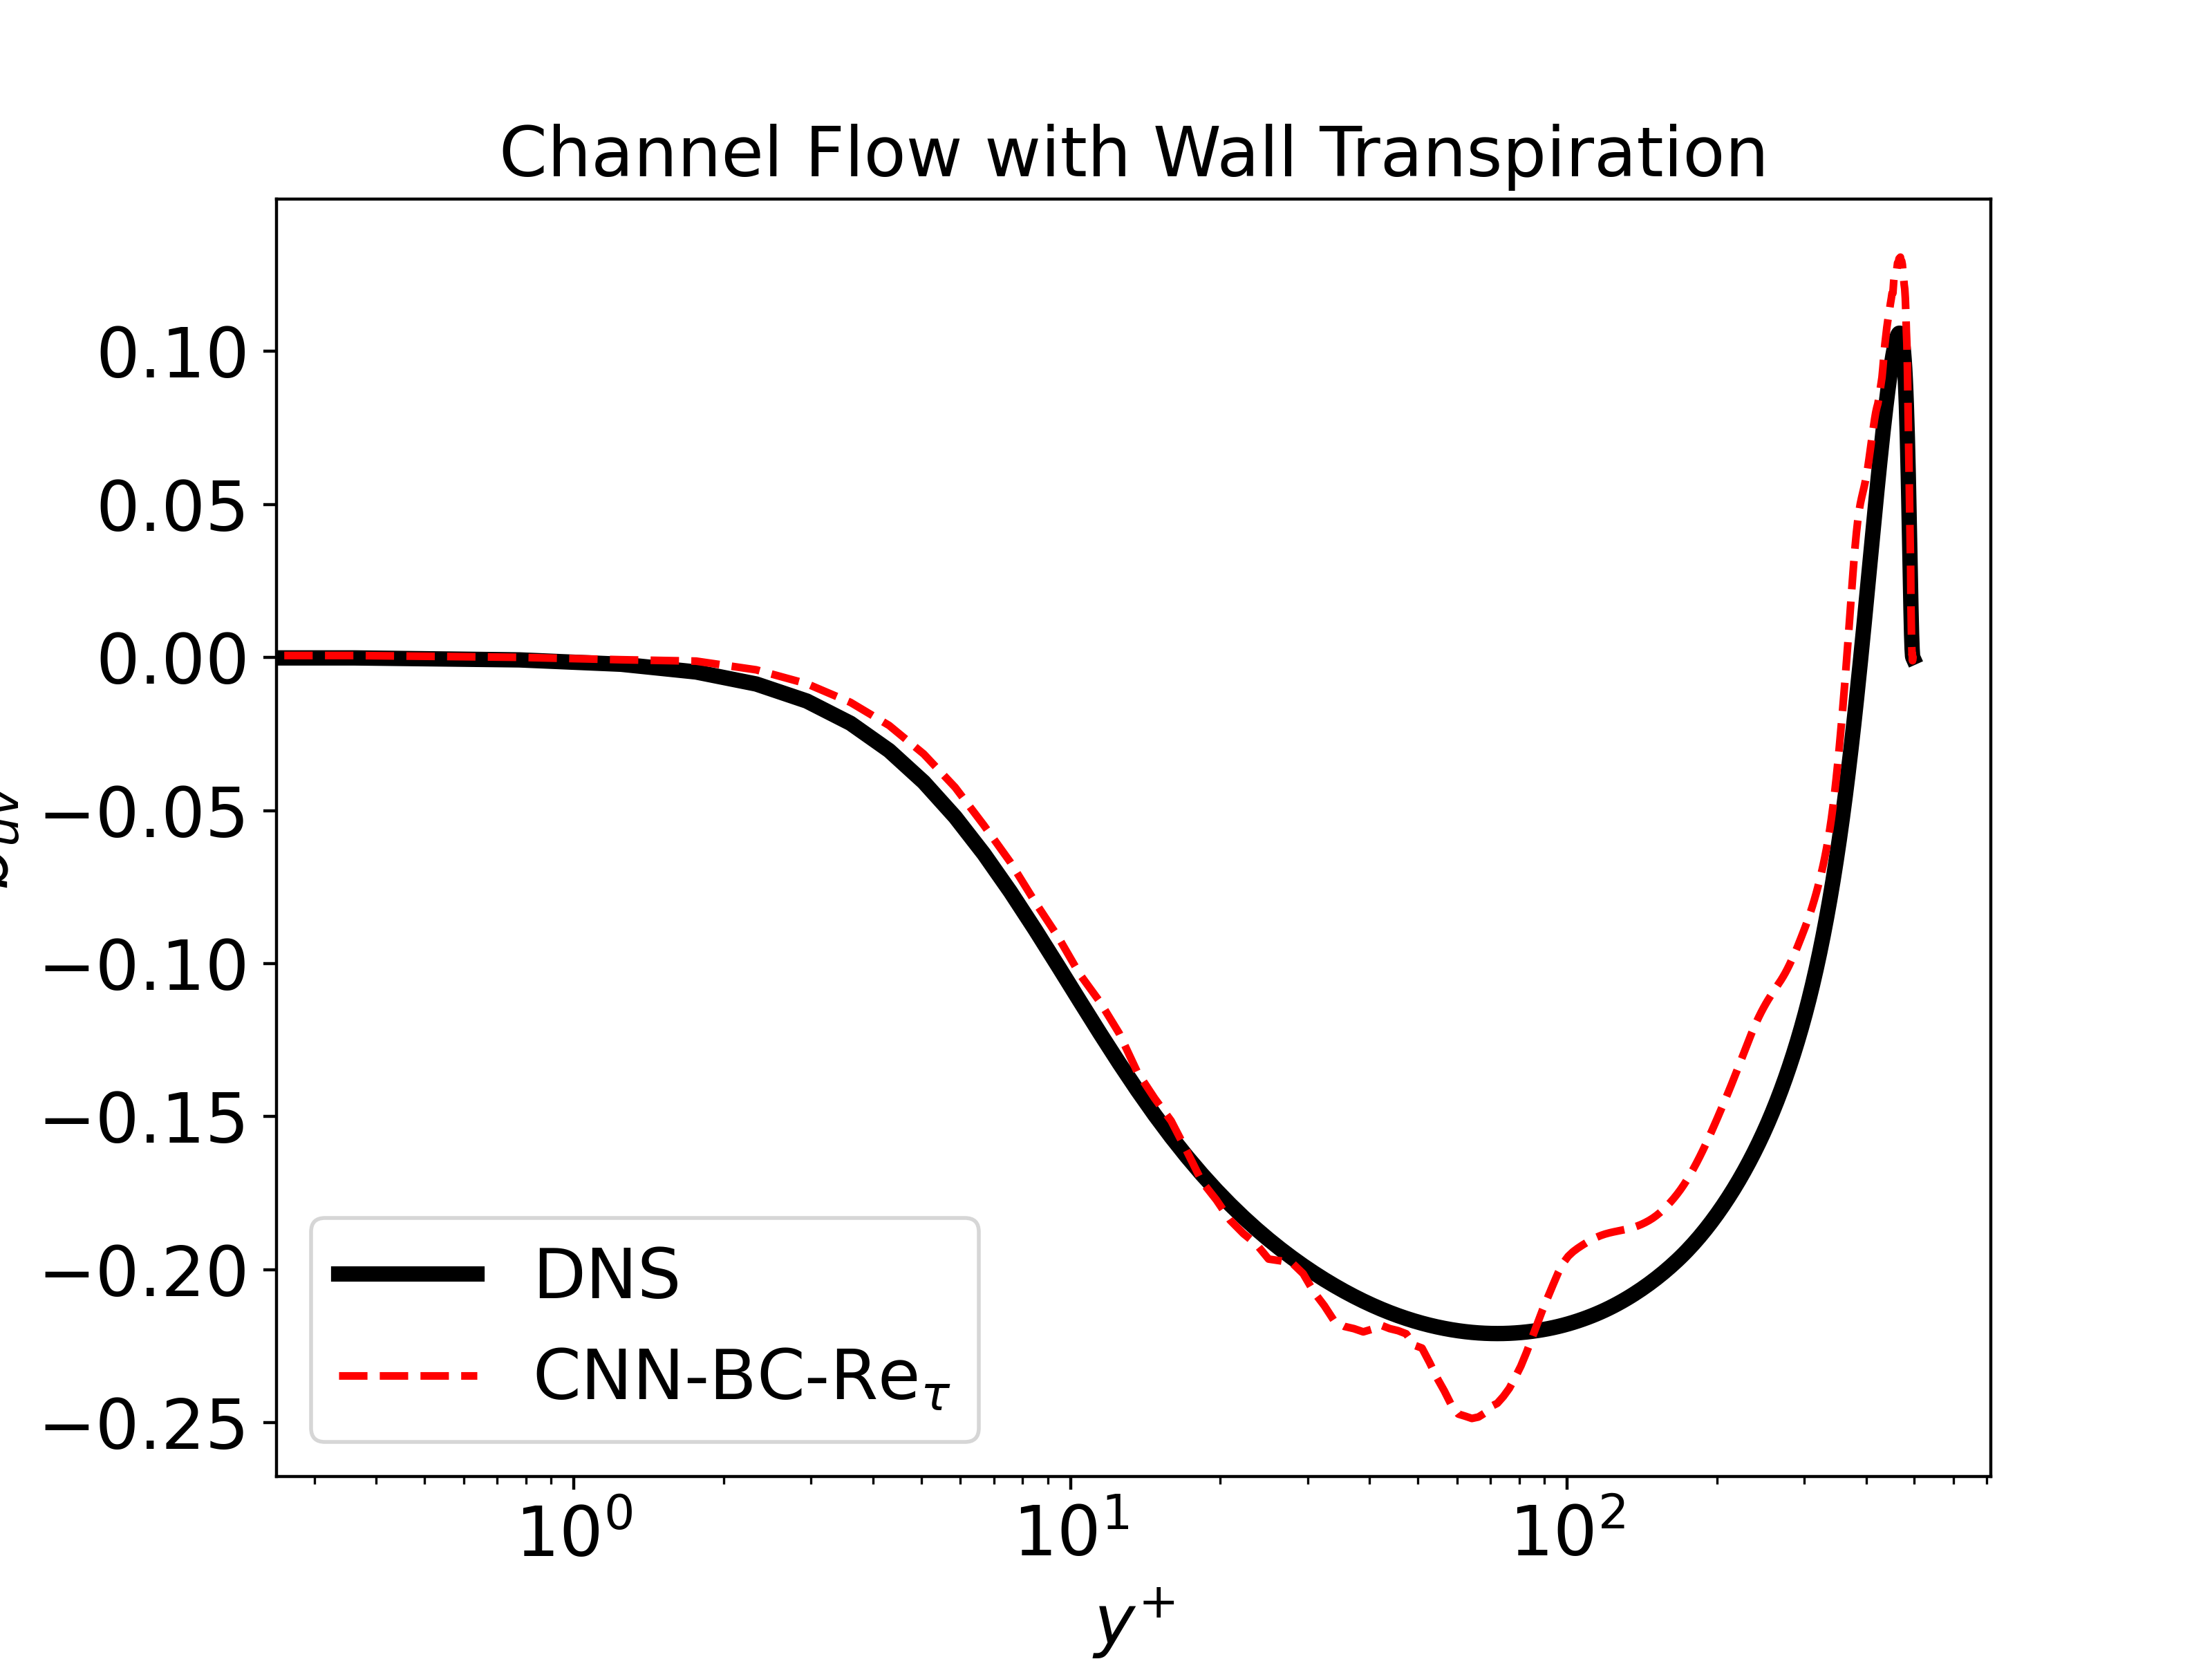

In [13]:
fig = plt.figure(figsize=[8,6], dpi=300)
plt.plot(yplus_val_in[0,0,:].detach().cpu().numpy(),(yval_in[0,0,:]/10).detach().cpu().numpy(), 'k',linewidth=4, label='DNS')
plt.plot(yplus_val_in[0,0,:].detach().cpu().numpy(), (model(xval_in,yplus_val_in)[0,0,:]/10).detach().cpu().numpy(),'r--',linewidth=2, label=r'CNN-BC-Re$_{\tau}$')

plt.legend(loc='lower left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xscale("log");
plt.title('Channel Flow with Wall Transpiration',fontsize=18)
 
plt.xlabel(r'$y^{+}$', fontsize=18); plt.ylabel(r'$b_{uv}$', fontsize=18);


<IPython.core.display.Javascript object>


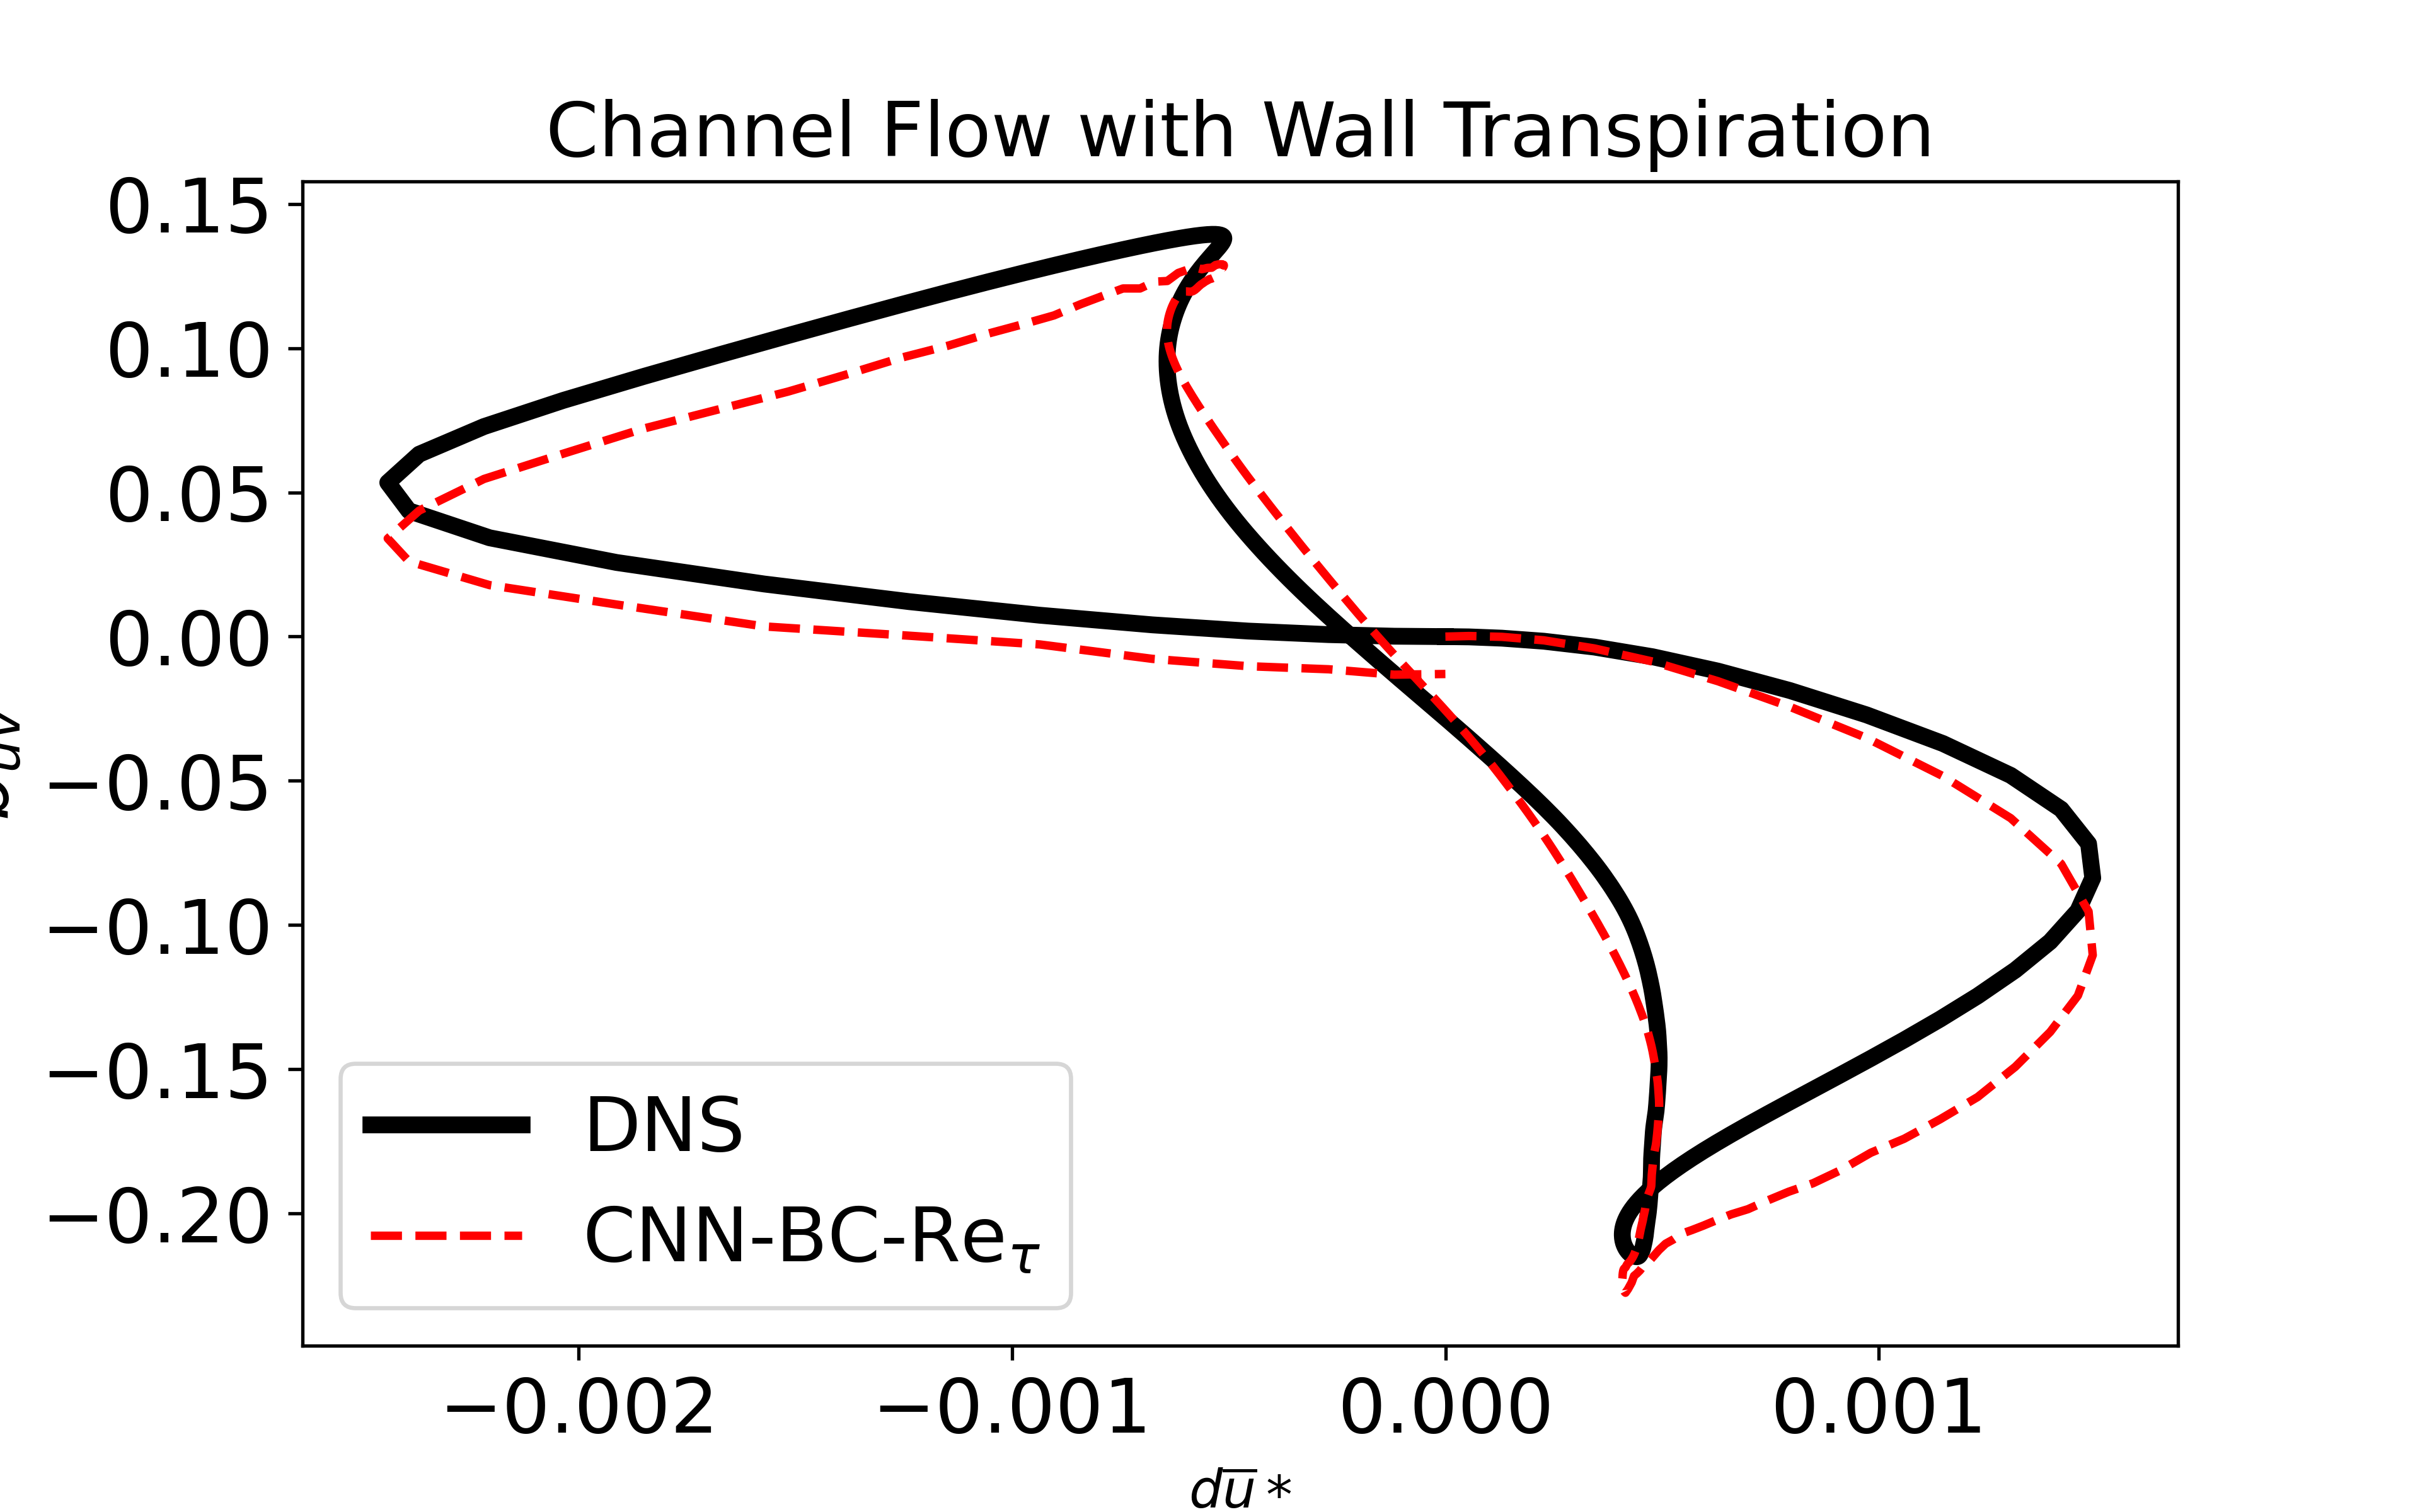

In [20]:
fig, host = plt.subplots(figsize=(8,5), dpi=300)
plt.plot(xval_in[0,0,:].detach().cpu().numpy(),(yval_in[0,0,:]/10).detach().cpu().numpy(), 'k',linewidth=4, label='DNS')
plt.plot(xval_in[0,0,:].detach().cpu().numpy(), (model(xval_in,yplus_val_in)[0,0,:]/10).detach().cpu().numpy(),'r--',linewidth=2, label=r'CNN-BC-Re$_{\tau}$')

plt.legend(loc='lower left',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Channel Flow with Wall Transpiration',fontsize=18)

xtick_loc = [-0.002,-0.001, 0, 0.001]
host.set_xticks(xtick_loc)
plt.xlabel(r'$\frac{d\overline{u}}{dy}^{*}$', fontsize=18); plt.ylabel(r'$b_{uv}$', fontsize=18);

<font size="45">Interpretability</font>

<h1>OCCLUSION

<IPython.core.display.Javascript object>


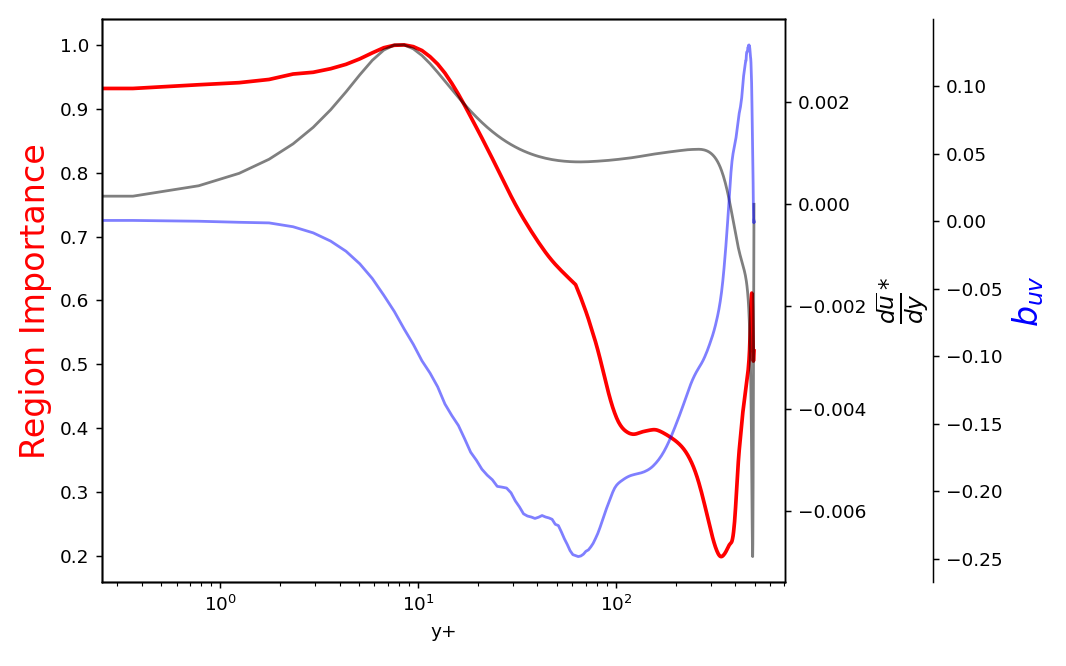

In [13]:
#OCCLUSION ALGORITMH

xtest_in=xtest_in[:,:,0:shapextest]
yplus_test_in=yplus_test_in[:,:,0:shapextest]
ytest_in=ytest_in[:,:,0:shapextest]

n_occlusions=50 #How many entries to occlude
importance=np.zeros(len(xtest_in[0,0])) #create perfomance array full of zeros
for i in range(len(xtest_in[0,0])-(n_occlusions-1)):
    xtest_in_trial=xtest_in.clone().detach().numpy() #If you try to copy the tensor directly it overwrites the original tensor
    
    for j in range(n_occlusions):
        xtest_in_trial[:,:,i+j]=0 #occlude entries
    
    xtest_in_trial_torch=torch.from_numpy(xtest_in_trial) #convert back to pytorch tensor
    
    trial=model(xtest_in_trial_torch,yplus_test_in) #Feed into the model
    a_test_trial=trial.clone().detach().numpy() #detach again
    b_test_trial=ytest_in.clone().detach().numpy() #detach agan
    a_test_trial=a_test_trial[0,0,:] #Reshape
    b_test_trial=b_test_trial[0,0,:] #Reshape
    
    for k in range(n_occlusions):
        importance[i+k]=importance[i+k]+abs(test_performance-criterion(ytest_in,trial)) #The higher the difference the more important the region is  

countdown=n_occlusions
for i in range(len(xtest_in[0,0])):
    if (i+1)<=n_occlusions:
        importance[i]=importance[i]/(i+1)
    elif (i+1)>(len(xtest_in[0,0])-(n_occlusions-1)):
        countdown=countdown-1
        importance[i]=importance[i]/(countdown)
    else:
        importance[i]=importance[i]/n_occlusions

importance=importance/max(importance) #normalize importance

# create figure and axis objects with subplots()
import matplotlib.pyplot as plt 

# Create figure and subplot manually
# fig = plt.figure()
# host = fig.add_subplot(111)

# More versatile wrapper
fig, host = plt.subplots(figsize=(8,5), dpi=100) # (width, height) in inches
# (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)
    
par1 = host.twinx()
par2 = host.twinx()
    
host.set_xlabel("y+")
host.set_ylabel("Region Importance", fontsize=18)
par1.set_ylabel(r'$\frac{d\overline{u}}{dy}^{*}$', fontsize=18)
par2.set_ylabel(r'$b_{uv}$', fontsize=18)

color1 = 'r'
color2 = 'k'
color3 = 'b'

p2, = par1.plot(yplus_test_in[0,0,:], xtest_in[0,0,:], label=r'$\frac{d\overline{u}}{dy}^{*}$')
p3, = par2.plot(yplus_test_in[0,0,:], a_test/10, label=r'$b_{uv}$')
p1, = host.plot(yplus_test_in[0,0,:], importance, label="Region Importance")



p1.set_color(color1)
p2.set_color(color2)
p3.set_color(color3)
p1.set_linewidth(2)
p2.set_alpha(0.5)
p3.set_alpha(0.5)

lns = [p1, p2, p3]
#host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 80))

# no x-ticks                 
par2.xaxis.set_ticks([])
plt.xscale("log"); 

# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

# Move "Velocity"-axis to the left
# par2.spines['left'].set_position(('outward', 60))
# par2.spines['left'].set_visible(True)
# par2.yaxis.set_label_position('left')
# par2.yaxis.set_ticks_position('left')

host.yaxis.label.set_color(color1)
par1.yaxis.label.set_color(color2)
par2.yaxis.label.set_color(color3)

# Adjust spacings w.r.t. figsize
fig.tight_layout()
# Alternatively: bbox_inches='tight' within the plt.savefig function 
#                (overwrites figsize)



<IPython.core.display.Javascript object>


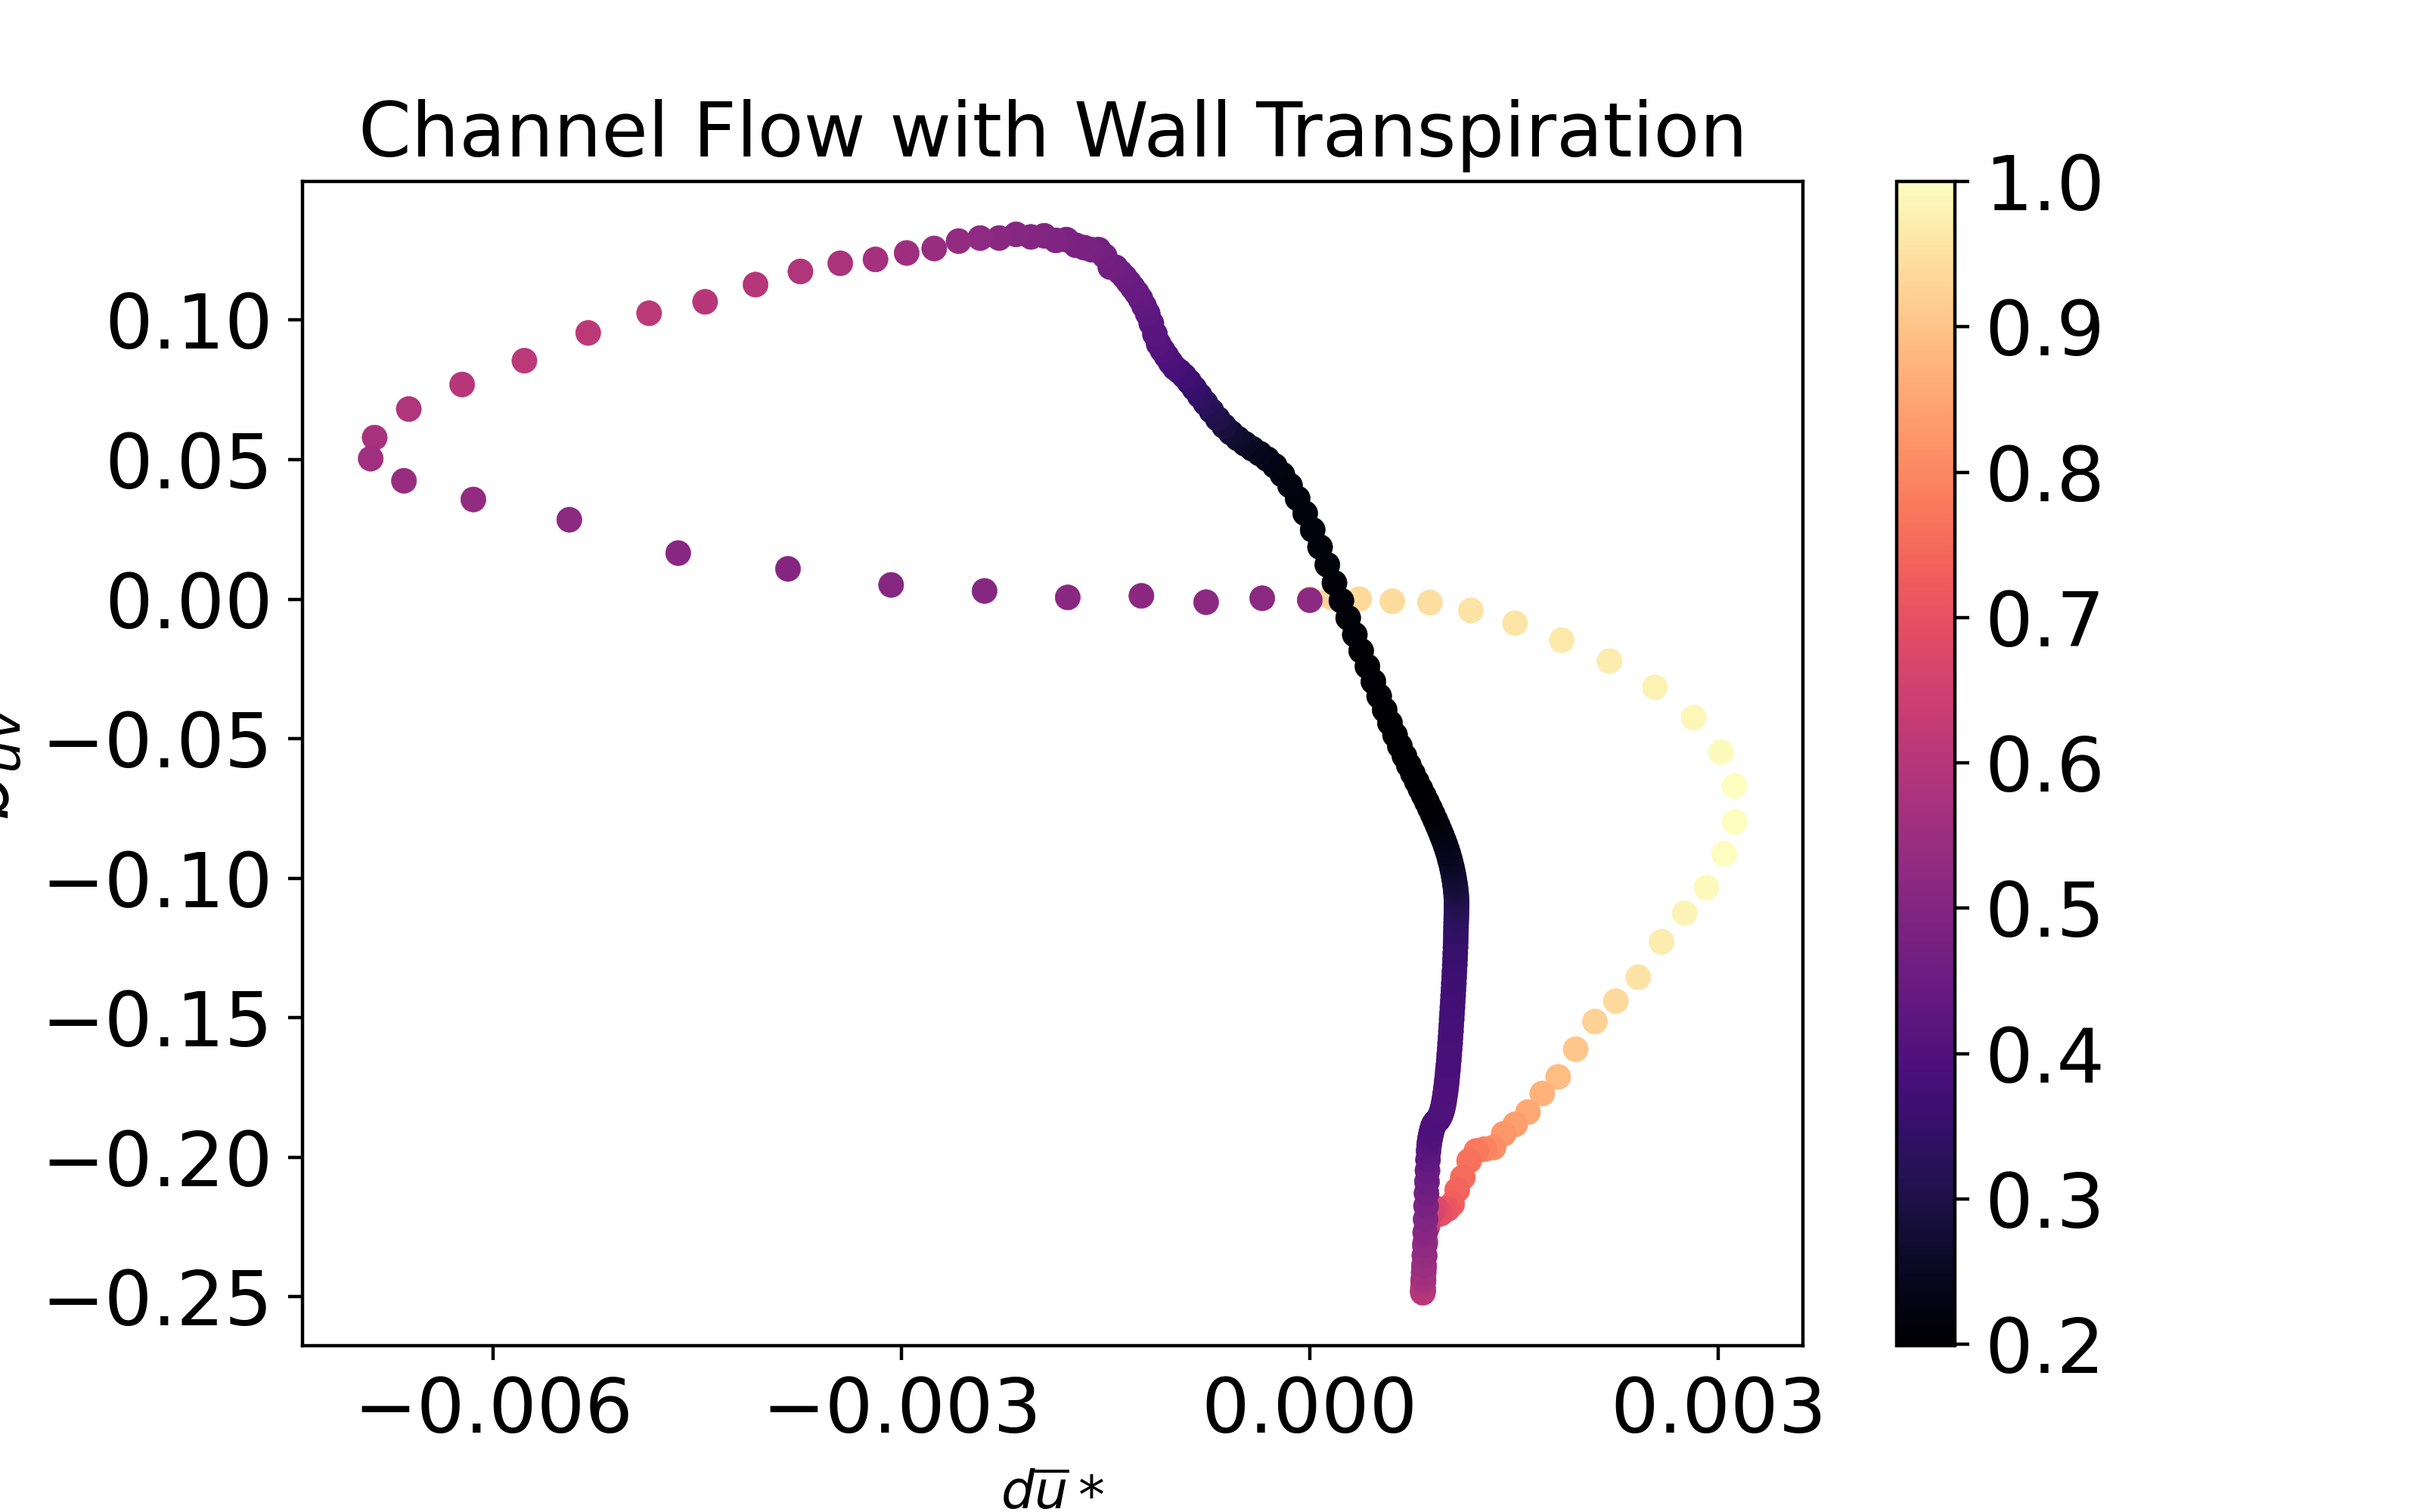

In [20]:
fig, host = plt.subplots(figsize=(8,5), dpi=300)
plt.scatter(xtest_in[0,0,:],a_test/10,c=importance, cmap="magma",linewidths=.1)
#plt.scatter(df_test['du_dy'],(yval_in[0,0,:]/10).detach().cpu().numpy(),linewidths=.1)
plt.xlabel(r'$\frac{d\overline{u}}{dy}^{*}$', fontsize=18); plt.ylabel(r'$b_{uv}$', fontsize=18);
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Channel Flow with Wall Transpiration', fontsize=18)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(18)

xtick_loc = [-0.006, -0.003, 0, 0.003]
host.set_xticks(xtick_loc)
fig.savefig('zz_transpiration1d_fixed_xticks.png',bbox_inches = 'tight')

<IPython.core.display.Javascript object>


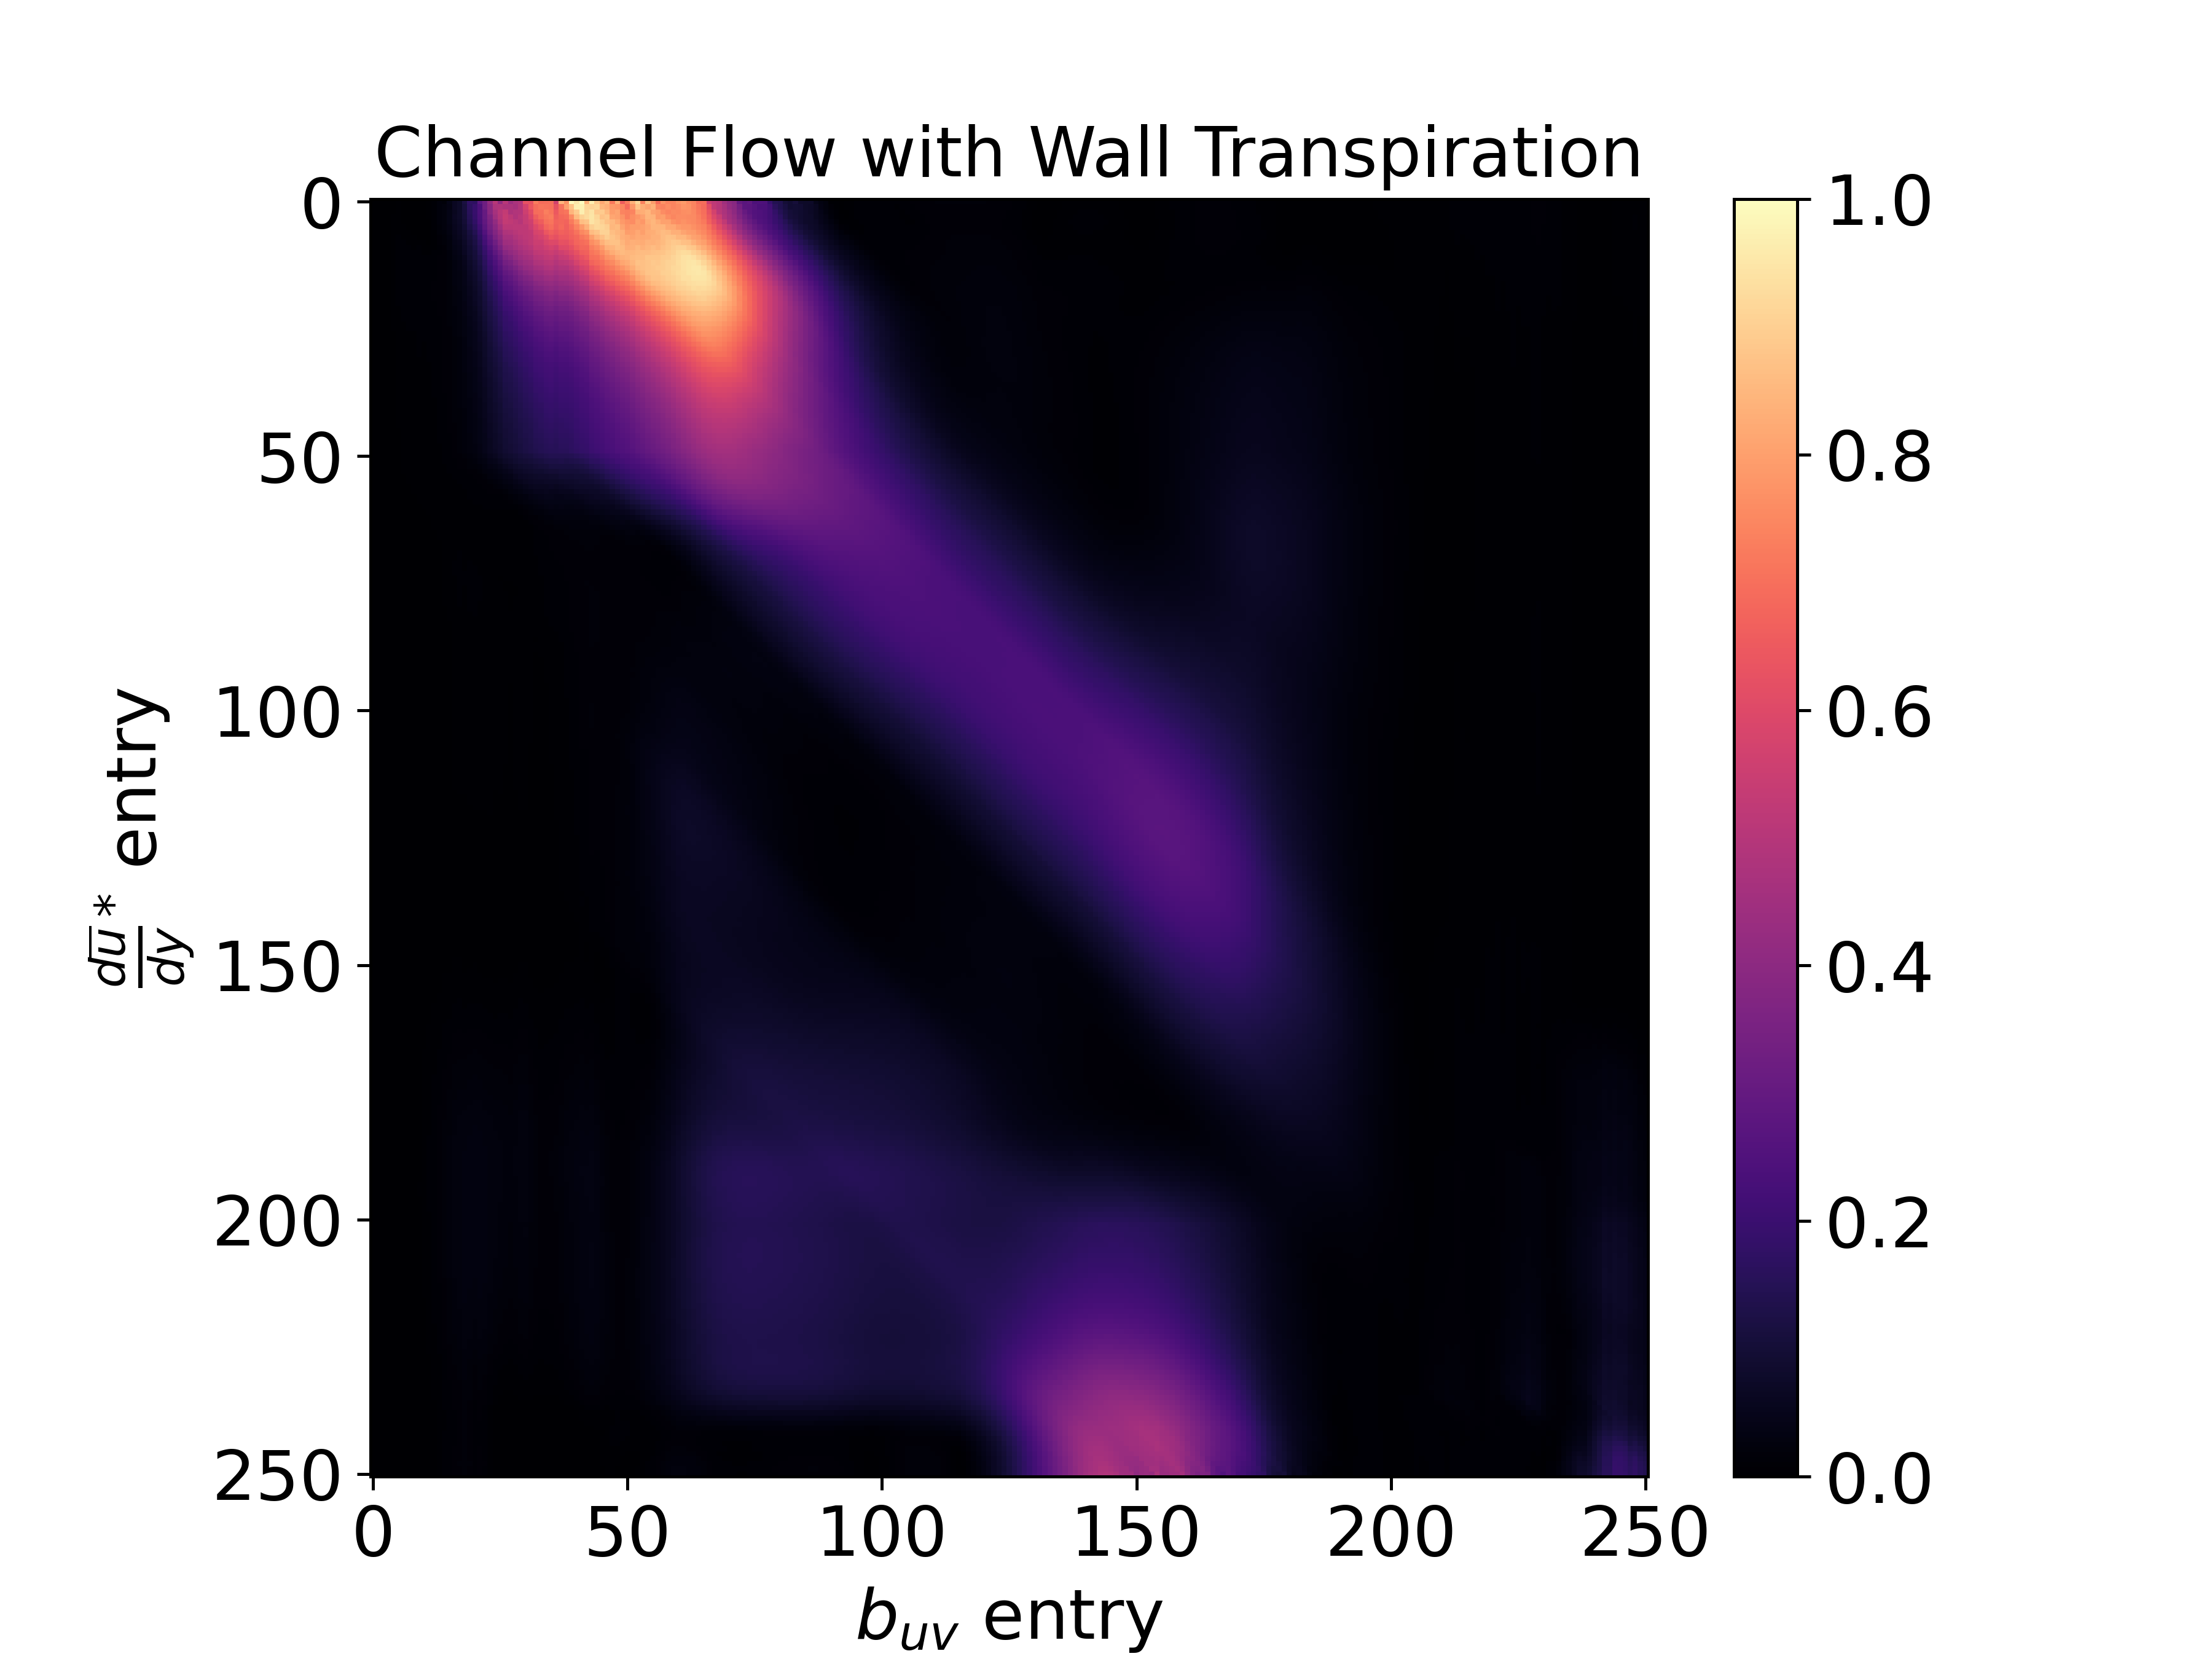

In [18]:
#OCCLUSION MAP ALGORITMH


n_occlusions=50 #How many entries to occlude
importance_map=np.zeros((len(xtest_in[0,0]), len(xtest_in[0,0]))) #create perfomance array full of zeros
for i in range(len(xtest_in[0,0])-(n_occlusions-1)):
    xtest_in_trial=xtest_in.clone().detach().numpy() #If you try to copy the tensor directly it overwrites the original tensor
    
    for j in range(n_occlusions):
        xtest_in_trial[:,:,i+j]=0 #occlude entries
    
    xtest_in_trial_torch=torch.from_numpy(xtest_in_trial) #convert back to pytorch tensor
    
    trial=model(xtest_in_trial_torch,yplus_test_in) #Feed into the model
    a_test_trial=trial.clone().detach().numpy() #detach again
    b_test_trial=ytest_in.clone().detach().numpy() #detach agan
    a_test_trial=a_test_trial[0,0,:] #Reshape
    b_test_trial=b_test_trial[0,0,:] #Reshape
    
    for k in range(n_occlusions):
        for l in range(len(xtest_in[0,0])): #calculations for each entry
            #importance_map[i+k,l]=importance_map[i+k,l]+abs(test_performance_piecewise[l]-criterion(trial[0,0,l],ytest_in[0,0,l])).cpu().detach().numpy()
            importance_map[i+k,l]=importance_map[i+k,l]+abs(test_performance_piecewise[l]-(b_test_trial[l]-a_test_trial[l])**2)
            

countdown=n_occlusions
for i in range(len(xtest_in[0,0])):
    if (i+1)<n_occlusions:
        importance_map[i,:]=importance_map[i,:]/(i+1)
    elif (i+1)>(len(xtest_in[0,0])-(n_occlusions-1)):
        countdown=countdown-1
        importance_map[i,:]=importance_map[i,:]/(countdown)
    else:
        importance_map[i,:]=importance_map[i,:]/n_occlusions

importance_map=importance_map/importance_map.max() #normalize importance

fig = plt.figure(figsize=[8,6], dpi=300)
cmap = plt.cm.get_cmap("magma", 147456)
plt.ylabel(r'$\frac{d\overline{u}}{dy}^{*}$ entry', fontsize=18); plt.xlabel(r'$b_{uv}$ entry', fontsize=18);
plt.imshow(importance_map, cmap=cmap)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.title('Channel Flow with Wall Transpiration', fontsize=18)
cbar = plt.colorbar()
for t in cbar.ax.get_yticklabels():
     t.set_fontsize(18)
fig.savefig('zz_trans_2d.png',bbox_inches = 'tight')

<h1>GRADIENTS: Smooth gradients

<IPython.core.display.Javascript object>


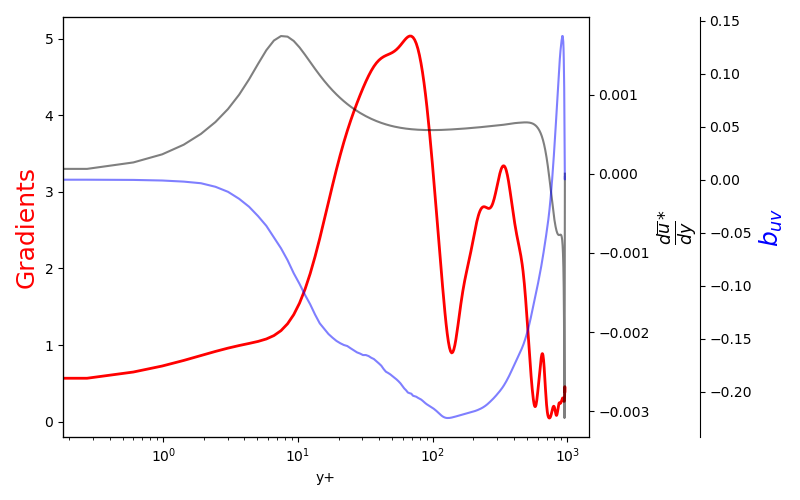

In [49]:
import scipy as sp
import scipy.ndimage
saliency_input = torch.autograd.Variable(xtest_in)
saliency_input.requires_grad = True
saliency_output = model(saliency_input, yplus_test_in)
saliency_loss = nn.MSELoss()
calculate_loss = saliency_loss(saliency_output,ytest_in)
#calculate_loss.requires_grad = True
grad = torch.autograd.grad(calculate_loss, saliency_input)
grad_plot= grad[0].numpy()
grad_plot = abs(grad_plot[0,0])
y_1d = sp.ndimage.filters.gaussian_filter1d(grad_plot, 5, mode='constant')
# More versatile wrapper
fig, host = plt.subplots(figsize=(8,5), dpi=100) # (width, height) in inches
# (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)
    
par1 = host.twinx()
par2 = host.twinx()
    
host.set_xlabel("y+")
host.set_ylabel("Gradients", fontsize=18)
par1.set_ylabel(r'$\frac{d\overline{u}}{dy}^{*}$', fontsize=18)
par2.set_ylabel(r'$b_{uv}$', fontsize=18)

color1 = 'r'
color2 = 'k'
color3 = 'b'

p2, = par1.plot(yplus_test_in[0,0,:], xtest_in[0,0,:], label=r'$\frac{d\overline{u}}{dy}^{*}$')
p3, = par2.plot(yplus_test_in[0,0,:], a_test/10, label=r'$b_{uv}$')
p1, = host.plot(yplus_test_in[0,0,:], y_1d, label="Gradients")



p1.set_color(color1)
p2.set_color(color2)
p3.set_color(color3)
p1.set_linewidth(2)
p2.set_alpha(0.5)
p3.set_alpha(0.5)

lns = [p1, p2, p3]
#host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 80))

# no x-ticks                 
par2.xaxis.set_ticks([])
plt.xscale("log"); 

host.yaxis.label.set_color(color1)
par1.yaxis.label.set_color(color2)
par2.yaxis.label.set_color(color3)

# Adjust spacings w.r.t. figsize
fig.tight_layout()
# Alternatively: bbox_inches='tight' within the plt.savefig function 
#                (overwrites figsize)

# Best for professional typesetting, e.g. LaTeX
#fig.savefig('gradient_convbc_third.png',bbox_inches = 'tight')

<IPython.core.display.Javascript object>


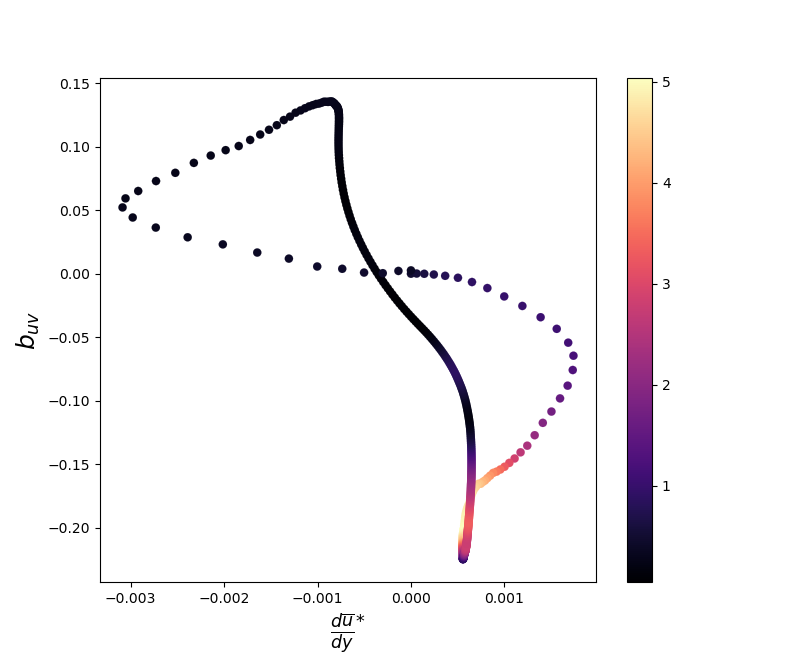

In [51]:
fig, host = plt.subplots(figsize=(8,5), dpi=100)
plt.scatter(xtest_in[0,0,:],a_test/10,c=y_1d, cmap="magma",linewidths=.1)
#plt.scatter(df_test['du_dy'],(yval_in[0,0,:]/10).detach().cpu().numpy(),linewidths=.1)
plt.xlabel(r'$\frac{d\overline{u}}{dy}^{*}$', fontsize=18); plt.ylabel(r'$b_{uv}$', fontsize=18);
plt.colorbar()
#fig.savefig('o1d_convbc_first2.png',bbox_inches = 'tight')